Problem Statement: This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [46]:
data=pd.read_csv('baseball.csv')


In [47]:
data.head(5)


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [48]:
data.shape


(30, 17)

In [49]:
data.columns
#Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, 
#Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, 
#Earned Run Average (ERA), Shutouts, Saves, and Errors

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [50]:
data.isnull().sum()


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no any null value



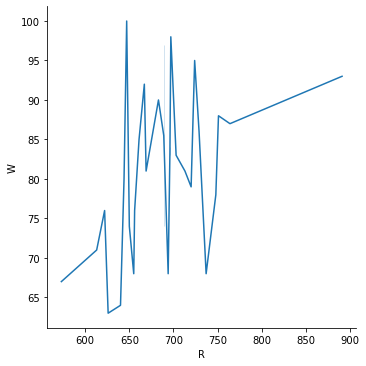

In [51]:
sns.relplot(x='R',y='W',data=data,kind='line')


<AxesSubplot:xlabel='R', ylabel='W'>

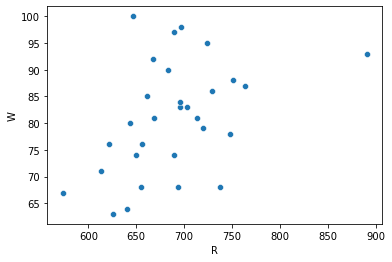

In [52]:
sns.scatterplot(x="R",y="W",data=data)


<AxesSubplot:xlabel='AB', ylabel='W'>

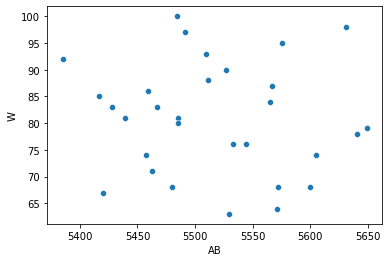

In [53]:
sns.scatterplot(x="AB",y="W",data=data)


<AxesSubplot:xlabel='H', ylabel='W'>

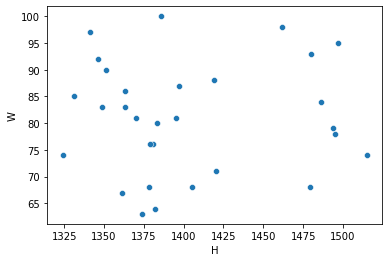

In [54]:
sns.scatterplot(x="H",y="W",data=data)


<AxesSubplot:xlabel='SB', ylabel='W'>

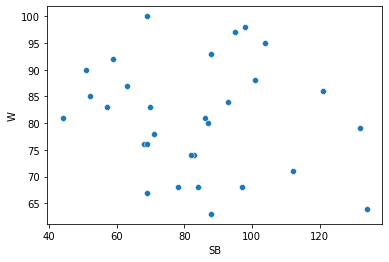

In [55]:
sns.scatterplot(x="SB",y="W",data=data)


<AxesSubplot:xlabel='ERA', ylabel='W'>

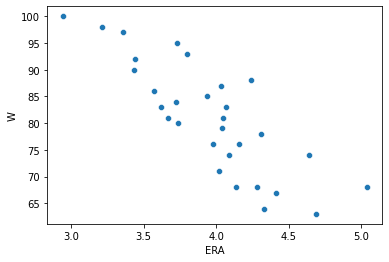

In [56]:
sns.scatterplot(x="ERA",y="W",data=data)


<AxesSubplot:xlabel='SV', ylabel='W'>

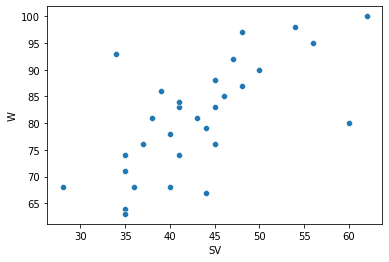

In [57]:
sns.scatterplot(x="SV",y="W",data=data)


<AxesSubplot:xlabel='E', ylabel='W'>

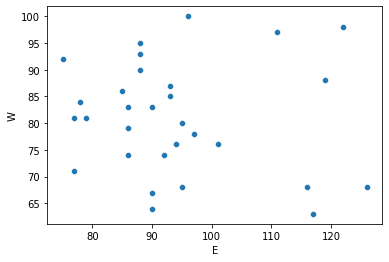

In [58]:
sns.scatterplot(x="E",y="W",data=data)


Many of the variables had a decent linear with wins. ERA looks to have the highest negative correlation with wins and On-base Percentage looks to have the highest positive correlation.



In [59]:
data.corr()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [60]:
data.dtypes


W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

### Spliting the data


In [61]:
x=data.iloc[:,1:18].values
y=data.iloc[:,0].values

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [63]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [64]:
def models(x_train,y_train):
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)
    
    #use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)
    
    #use SVC(linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(x_train,y_train)
    
    #use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(x_train,y_train)
    
    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(x_train,y_train)
    
    #use decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)
    
    #use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)
    
    print('[0]Logistic Regression training Accuracy:   ' , log.score(x_train,y_train))
    print('[1]KNeighbors training Accuracy:            ' , knn.score(x_train,y_train))
    print('[2]SVC(linear kernel) training Accuracy:    ' , svc_lin.score(x_train,y_train))
    print('[3]SVC (RBF kernel) training Accuracy:      ' , svc_rbf.score(x_train,y_train))
    print('[4]GaussianNB training Accuracy:            ' , gauss.score(x_train,y_train))
    print('[5]DecisionTreeClassifier training Accuracy:' , tree.score(x_train,y_train))
    print('[6]RandomForestClassifier training Accuracy:' , forest.score(x_train,y_train))
    
    return log, knn, svc_lin, svc_rbf ,gauss, tree ,forest

In [65]:
model=models(x_train,y_train)


[0]Logistic Regression training Accuracy:    1.0
[1]KNeighbors training Accuracy:             0.25
[2]SVC(linear kernel) training Accuracy:     1.0
[3]SVC (RBF kernel) training Accuracy:       0.5833333333333334
[4]GaussianNB training Accuracy:             1.0
[5]DecisionTreeClassifier training Accuracy: 1.0
[6]RandomForestClassifier training Accuracy: 1.0


#### most of the models have accuracy of 100%

